In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from datetime import datetime
%matplotlib inline

# Install folium if needed:
#!pip install folium
import folium

In [167]:
with open('turnstiles_full.pickle', 'rb') as file:
    mta_full = pickle.load(file)
with open('turnstiles_by_day.pickle', 'rb') as file2:
    mta_by_day = pickle.load(file2)
mta_by_day.head()

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE,PREV_ENTRIES,PREV_EXITS,weekday,daily_entries,daily_exits
1,A002,R051,02-00-00,59 ST,7063280,2393719,2019-05-18,7062481.0,2393489.0,Saturday,799.0,230.0
2,A002,R051,02-00-00,59 ST,7063983,2393895,2019-05-19,7063280.0,2393719.0,Sunday,703.0,176.0
3,A002,R051,02-00-00,59 ST,7065493,2394422,2019-05-20,7063983.0,2393895.0,Monday,1510.0,527.0
4,A002,R051,02-00-00,59 ST,7067101,2394950,2019-05-21,7065493.0,2394422.0,Tuesday,1608.0,528.0
5,A002,R051,02-00-00,59 ST,7068769,2395465,2019-05-22,7067101.0,2394950.0,Wednesday,1668.0,515.0


([<matplotlib.axis.XTick at 0x1a247bed68>,
 <a list of 27 Text xticklabel objects>)

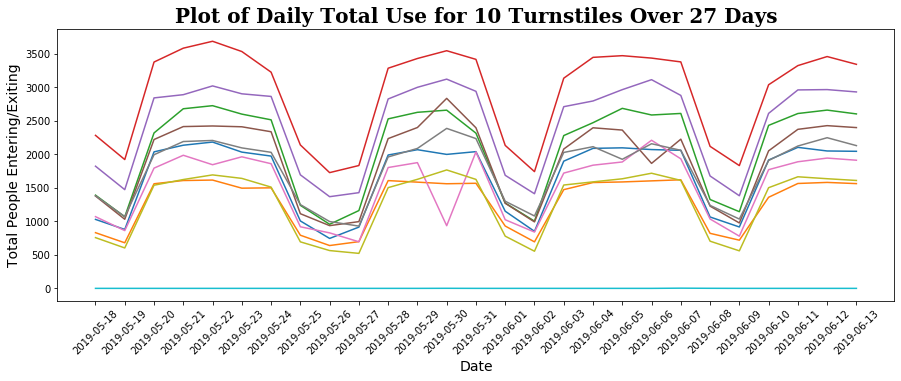

In [173]:
mta_by_day['daily_traffic'] = mta_by_day['daily_entries'] + mta_by_day['daily_exits']
num_days = len(mta_by_day.DATE.unique())
num_turnstiles = 10

plt.figure(figsize=(15,5))
for i, _ in mta_by_day.reset_index().iloc[0:(num_days*num_turnstiles):num_days].iterrows():
    plt.plot(mta_by_day.DATE.iloc[i:(i+num_days)], mta_by_day.daily_traffic.iloc[i:(i+num_days)])
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total People Entering/Exiting', fontsize = 14)
plt.title('Plot of Daily Total Use for {} Turnstiles Over {} Days'.format(num_turnstiles, num_days), 
          family = 'Serif', fontsize = 20, weight = 'bold')
ticks_x = mta_by_day.DATE.iloc[0:num_days]
plt.xticks(ticks_x, rotation = 45)

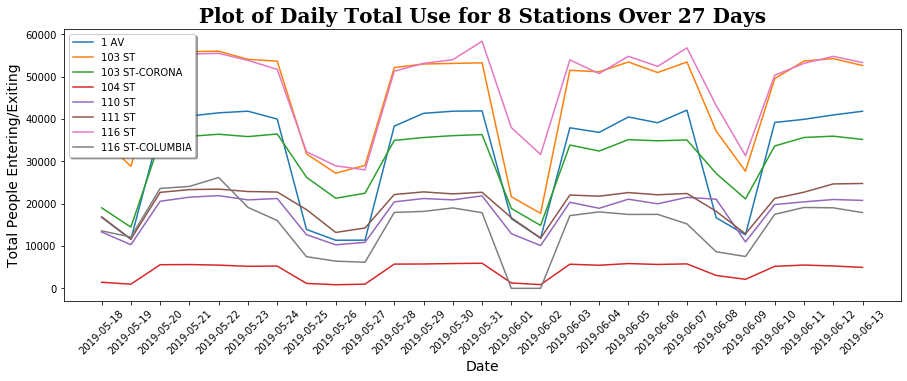

In [209]:
mta_by_station_day = mta_by_day.groupby(['STATION', 'DATE', 'weekday'], as_index = False).sum()
num_stations = 8

plt.figure(figsize=(15,5))
for i, _ in mta_by_station_day.reset_index().iloc[0:(num_days*num_stations):num_days].iterrows():
    plt.plot(mta_by_station_day.DATE.iloc[i:(i+num_days)], 
             mta_by_station_day.daily_traffic.iloc[i:(i+num_days)])
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total People Entering/Exiting', fontsize = 14)
plt.title('Plot of Daily Total Use for {} Stations Over {} Days'.format(num_stations, num_days), 
          family = 'Serif', fontsize = 20, weight = 'bold')
ticks_x = mta_by_station_day.DATE.iloc[0:num_days]
plt.xticks(ticks_x, rotation = 45)
plt.legend(mta_by_station_day.iloc[0:(num_days*num_stations):num_days, 0], shadow = True)

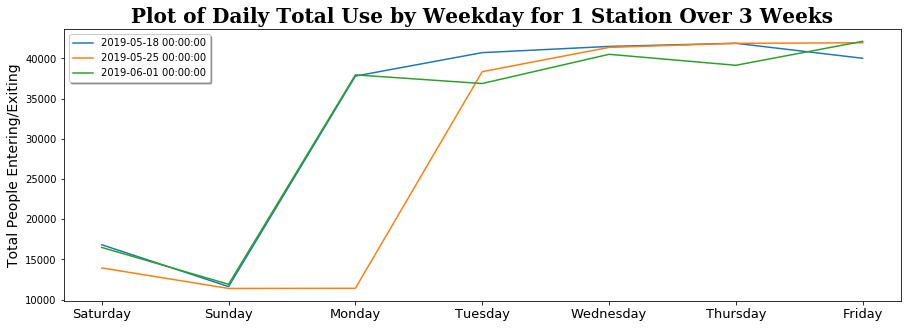

In [215]:
num_weeks = 3

plt.figure(figsize=(15,5))
for i, _ in mta_by_station_day.reset_index().iloc[0:(7*num_weeks):7].iterrows():
    plt.plot(mta_by_station_day.weekday.iloc[i:(i+7)], mta_by_station_day.daily_traffic.iloc[i:(i+7)])
plt.ylabel('Total People Entering/Exiting', fontsize = 14)
plt.title('Plot of Daily Total Use by Weekday for 1 Station Over {} Weeks'.format(num_weeks), 
          family = 'Serif', fontsize = 20, weight = 'bold')
ticks_x = mta_by_station_day.weekday.iloc[0:7]
plt.xticks(ticks_x, fontsize = 13)
plt.legend(mta_by_station_day.iloc[0:num_days:7].DATE, shadow = True)

In [217]:
busy_stations = mta_by_station_day.groupby('STATION', as_index = False)\
    .daily_traffic.sum().sort_values('daily_traffic', ascending = False)
busy_stations.head(20)

,STATION,daily_traffic
225,FULTON ST,1.127915e+09
284,MOSHOLU PKWY,5.182444e+08
39,20 AV,8.343768e+06
61,34 ST-PENN STA,7.429806e+06
232,GRD CNTRL-42 ST,6.210407e+06
59,34 ST-HERALD SQ,5.306102e+06
14,14 ST-UNION SQ,4.607606e+06
352,TIMES SQ-42 ST,4.605599e+06
46,23 ST,4.471379e+06
68,42 ST-PORT AUTH,4.047311e+06


Text(0.5, 1.0, 'Histogram of log(total traffic) for all stations')

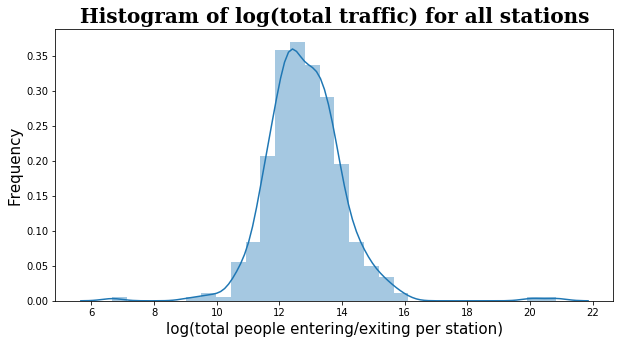

In [225]:
plt.figure(figsize = (10, 5))
sns.distplot(np.log(busy_stations.daily_traffic), 30)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('log(total people entering/exiting per station)', fontsize = 15)
plt.title('Histogram of log(total traffic) for all stations', 
          family = 'Serif', fontsize = 20, weight = 'bold')

Text(0.5, 1.0, 'Barplot of stations sorted by total traffic')

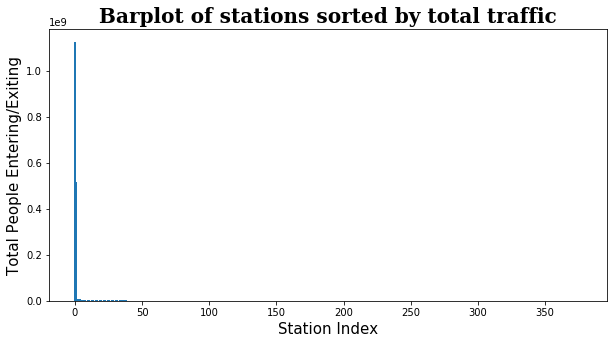

In [227]:
busy_stations = busy_stations.reset_index()

plt.figure(figsize = (10, 5))
plt.bar(busy_stations.index, busy_stations.daily_traffic)
plt.ylabel('Total People Entering/Exiting', fontsize = 15)
plt.xlabel('Station Index', fontsize = 15)
plt.title('Barplot of stations sorted by total traffic', 
          family = 'Serif', fontsize = 20, weight = 'bold')

In [133]:
loc_url = 'http://web.mta.info/developers/data/nyct/subway/Stations.csv'
mta_loc = pd.read_csv(loc_url)
mta_loc.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [134]:
mta_loc.rename(columns={'Stop Name': 'STATION', 'GTFS Latitude': 'LAT', 'GTFS Longitude': 'LONG'}, inplace = True)
mta_loc['STATION'] = mta_loc.STATION.str.upper()
mta_loc['STATION'] = mta_loc.STATION.str.replace(' - ', '-')
mta_loc = mta_loc.drop_duplicates('STATION').drop(columns = ['Station ID', 'Complex ID', 'GTFS Stop ID',
                                                            'Division', 'Structure', 'North Direction Label',
                                                            'South Direction Label'])
mta_loc.head()

,Line,STATION,Borough,Daytime Routes,LAT,LONG
0,Astoria,ASTORIA-DITMARS BLVD,Q,N W,40.775036,-73.912034
1,Astoria,ASTORIA BLVD,Q,N W,40.770258,-73.917843
2,Astoria,30 AV,Q,N W,40.766779,-73.921479
3,Astoria,BROADWAY,Q,N W,40.761820,-73.925508
4,Astoria,36 AV,Q,N W,40.756804,-73.929575


In [135]:
mta_join = mta_by_day.merge(mta_loc, how = 'inner', on = 'STATION')
print(mta_join.shape, mta_by_day.shape)
mta_join.head()

(79538, 17) (128543, 12)


,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE,PREV_ENTRIES,PREV_EXITS,weekday,daily_entries,daily_exits,Line,Borough,Daytime Routes,LAT,LONG
0,A002,R051,02-00-00,59 ST,7063280,2393719,2019-05-18,7062481.0,2393489.0,Saturday,799.0,230.0,4th Av,Bk,N R,40.641362,-74.017881
1,A002,R051,02-00-00,59 ST,7063983,2393895,2019-05-19,7063280.0,2393719.0,Sunday,703.0,176.0,4th Av,Bk,N R,40.641362,-74.017881
2,A002,R051,02-00-00,59 ST,7065493,2394422,2019-05-20,7063983.0,2393895.0,Monday,1510.0,527.0,4th Av,Bk,N R,40.641362,-74.017881
3,A002,R051,02-00-00,59 ST,7067101,2394950,2019-05-21,7065493.0,2394422.0,Tuesday,1608.0,528.0,4th Av,Bk,N R,40.641362,-74.017881
4,A002,R051,02-00-00,59 ST,7068769,2395465,2019-05-22,7067101.0,2394950.0,Wednesday,1668.0,515.0,4th Av,Bk,N R,40.641362,-74.017881


In [233]:
busy_stations.STATION[0:10]

0          FULTON ST
1       MOSHOLU PKWY
2              20 AV
3     34 ST-PENN STA
4    GRD CNTRL-42 ST
5    34 ST-HERALD SQ
6     14 ST-UNION SQ
7     TIMES SQ-42 ST
8              23 ST
9    42 ST-PORT AUTH
Name: STATION, dtype: object

In [244]:
sorted(mta_loc.STATION)

['1 AV',
 '103 ST',
 '103 ST-CORONA PLAZA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA UNIVERSITY',
 '121 ST',
 '125 ST',
 '135 ST',
 '137 ST-CITY COLLEGE',
 '138 ST-GRAND CONCOURSE',
 '14 ST',
 '14 ST-UNION SQ',
 '145 ST',
 '149 ST-GRAND CONCOURSE',
 '15 ST-PROSPECT PARK',
 '155 ST',
 '157 ST',
 '161 ST-YANKEE STADIUM',
 '163 ST-AMSTERDAM AV',
 '167 ST',
 '168 ST',
 '168 ST-WASHINGTON HTS',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST-QUEENSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '28 ST',
 '3 AV',
 '3 AV-138 ST',
 '3 AV-149 ST',
 '30 AV',
 '33 ST',
 '34 ST-11 AV',
 '34 ST-HERALD SQ',
 '34 ST-PENN STATION',
 '36 AV',
 '36 ST',
 '39 AV',
 '4 AV',
 '40 ST',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTHORITY BUS TERMINAL',
 '45 ST',
 '46 ST',
 '47-50 STS-ROCKEFE

In [243]:
m = folium.Map([40.75, -73.91], zoom_start=12)
for index, row in mta_join[mta_join.DATE=='2019-05-20'].iterrows():
    folium.CircleMarker([row['LAT'], row['LONG']], radius = 8, color = 'blue').add_to(m)
for index, row in mta_join[(mta_join.DATE=='2019-05-20') & (mta_join.STATION.isin(busy_stations.STATION[0:10]))].iterrows():
    folium.CircleMarker([row['LAT'], row['LONG']], radius = 8, color = 'red').add_to(m)
m

In [137]:
m.save('station_map.html')